## Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import random
import statsmodels.api as sm
import scipy.stats as stat
import pylab

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Load the data

In [2]:
df_census = pd.read_csv("https://raw.githubusercontent.com/mohittomar2008/Census-Income-Project/main/census_income.csv")
df_census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Summary of data

In [3]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df_census.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


## Check if there is any missing values

In [5]:
df_census.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

## Split the Categorical & Numerical columns for further analysis

In [6]:
catg_features = [col for col in list(df_census.columns) if df_census[col].dtype == 'object' if col not in ['Income']]
cont_features = [col for col in list(df_census.columns) if df_census[col].dtype != 'object' if col not in ['Income']]

In [7]:
print(f'Number of categorical features: {len(catg_features)}')
print(f'Number of continuos features: {len(cont_features)}')

Number of categorical features: 8
Number of continuos features: 6


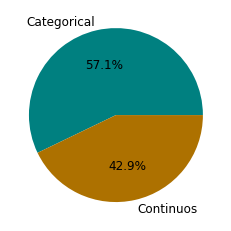

In [8]:
plt.pie([len(catg_features), len(cont_features)], 
        labels=['Categorical', 'Continuos'],
        colors=['#008080', '#ad7100'],
        textprops={'fontsize': 12},
        autopct='%1.1f%%')
plt.show()

## Distribution of Continuous features

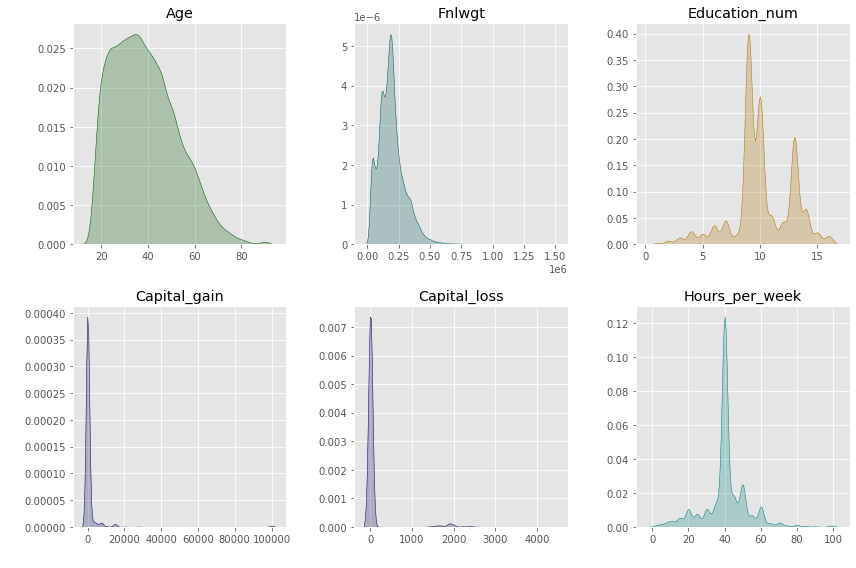

In [9]:
color_ = ['#000057', '#005757', '#005700' ,'#ad7100',  '#008080', '#575757', '#003153'] 
cmap_ = ['magma', 'copper', 'crest']

plt.figure(figsize= (12,8))
for i,col in enumerate(df_census[cont_features].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(2,3, i+1)
         
    sns.kdeplot(df_census[col], color = rand_col, fill = rand_col, palette = cmap_[random.sample(range(3), 1)[0]])
    plt.title(col, color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

plt.show();

## Distribution of Categorical features

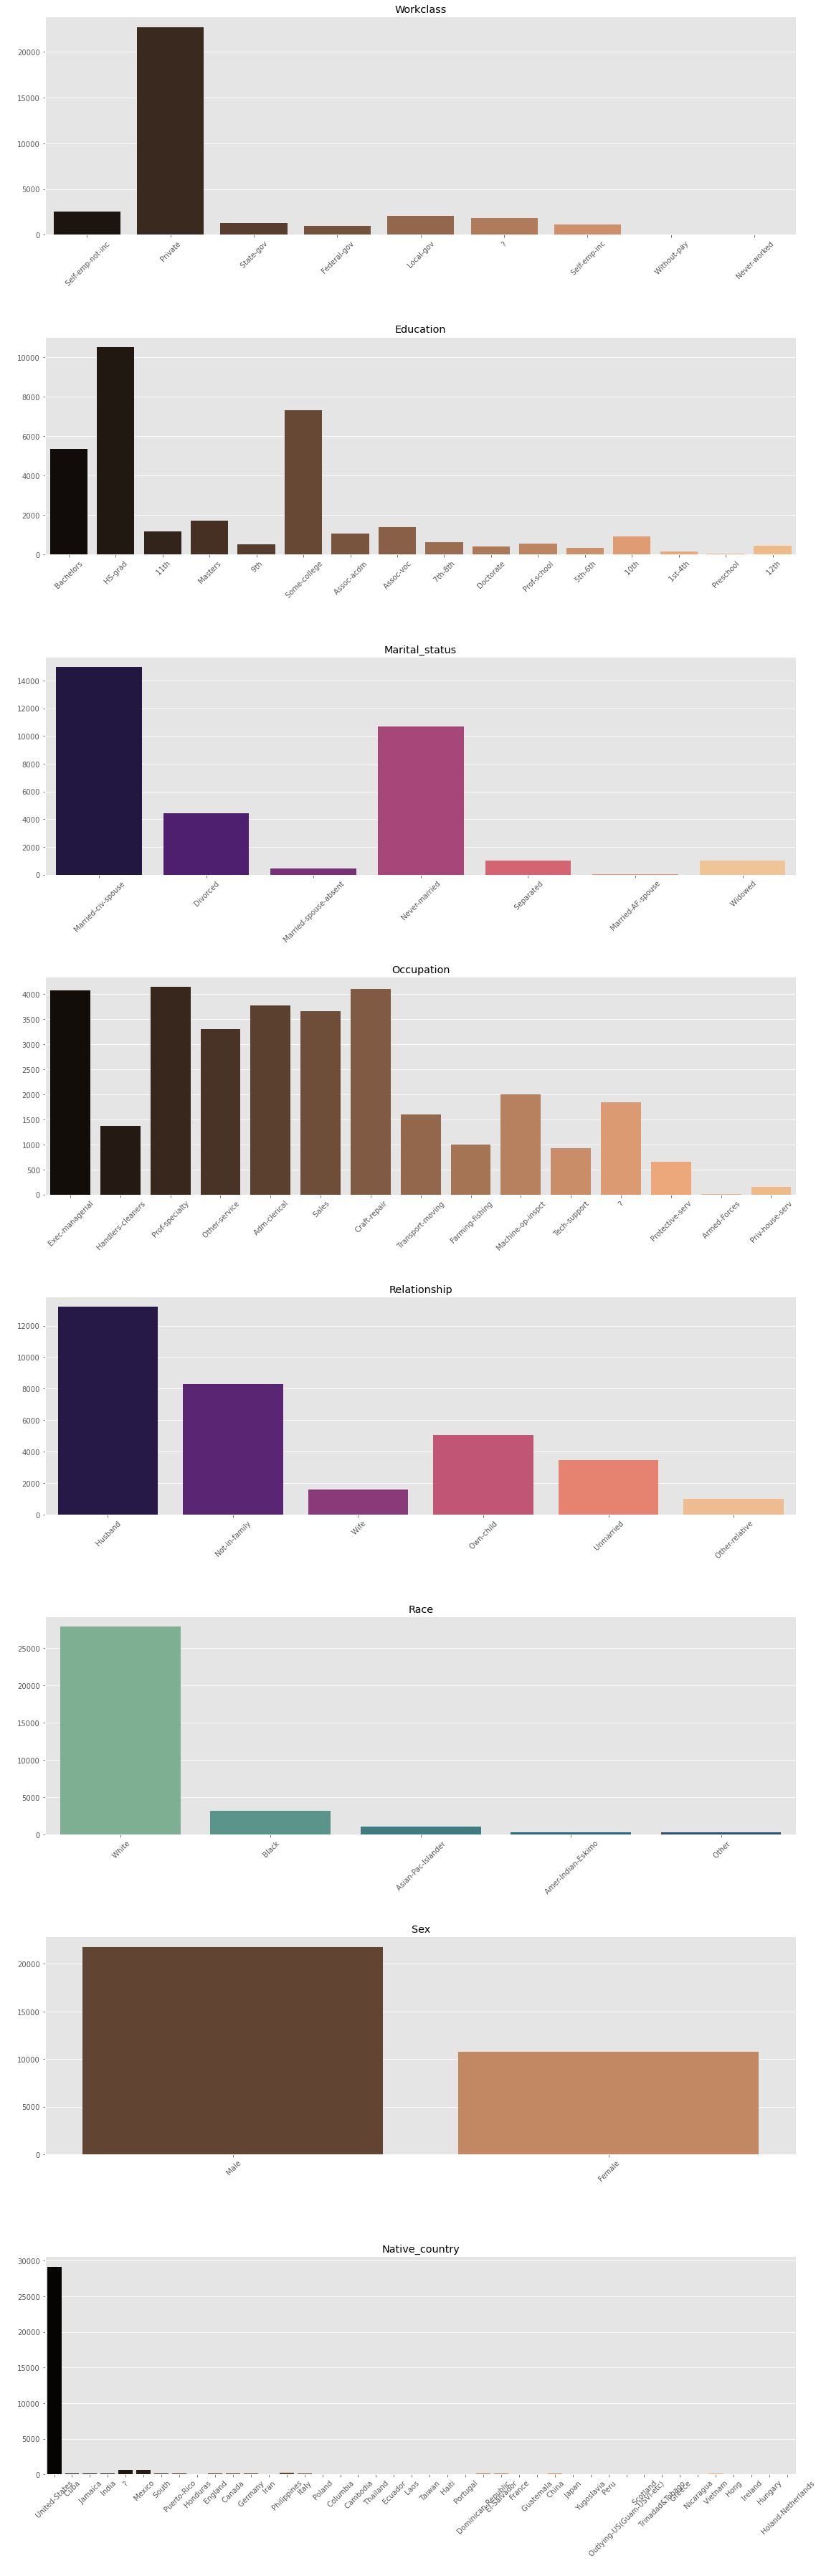

In [10]:
color_ = ['#000057', '#005757', '#005700' ,'#ad7100',  '#008080', '#575757', '#003153'] 
cmap_ = ['magma', 'copper', 'crest']

plt.figure(figsize= (16,50))
for i,col in enumerate(df_census[catg_features].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(8,1, i+1)
         
    sns.countplot(data= df_census , x = col, color = rand_col, fill = rand_col, palette = cmap_[random.sample(range(3), 1)[0]])
    plt.title(col, color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.xticks(rotation = 45)
    plt.tight_layout()

plt.show();

> <h3>Inferences</h3>

 - Most of the continuous features are right skewed
 - The features "Workclass", "Occupation" and "Native_country" has incorrect or missing values (?) in it. This needs to be imputed

## Handling Missing values

1. As the features which has missing or incorrect values, are categorical in nature, we need to impute them using the statistical technique **Mode**.
2. If we look at the below correlation matrix, the features "**Workclass**" and "**Occupation**" are strongly correlated with "**Education**" feature. So missing values needs to be imputed based on the "Education" feature values. For example, if any person who is having higher eduction such as Doctorate, may end up with good "Workclass" and "Occupation".

In [11]:
df = df_census[['Workclass','Occupation','Native_country', 'Education']]

In [12]:
for i in df.columns:
    le=LabelEncoder()
    df[i]= le.fit_transform(df[i]);

<ipython-input-12-9959de2fa493>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]= le.fit_transform(df[i]);


<AxesSubplot:>

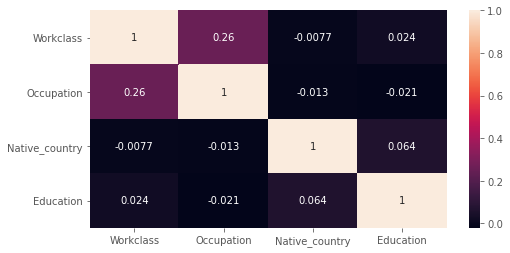

In [13]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True)

In [14]:
# Workclass classification of person who is having Doctorate.
# Similarly, based on the eduction, we can impute the values for 'Workclass' & 'Occupation'

df_census[df_census['Education'] == ' Doctorate']['Workclass'].value_counts()

 Private             181
 State-gov            89
 Self-emp-not-inc     50
 Self-emp-inc         35
 Local-gov            27
 Federal-gov          16
 ?                    15
Name: Workclass, dtype: int64

#### Replace '?' with 'Nan' values

In [15]:
df_census = df_census.replace(' ?',np.nan)

In [16]:
df_census['Workclass'] = df_census.groupby("Education")['Workclass'].transform(lambda grp: grp.fillna(stat.mode(grp).mode[0]))

In [17]:
df_census['Occupation'] = df_census.groupby("Education")['Occupation'].transform(lambda grp: grp.fillna(stat.mode(grp).mode[0]))

#### Native_country is not related to any other features So it can be imputed using the most used value (mode)

In [18]:
df_census[df_census['Native_country'].isna() == True]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
60,32,Private,293936,7th-8th,4,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,0,0,40,NaN,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


In [19]:
df_census['Native_country'].fillna(df_census['Native_country'].mode()[0], inplace=True)

### Education vs Education_Num - Comparison

In [20]:
for col in df_census['Education'].value_counts().index:
    num = df_census[df_census['Education'] == col]['Education_num'].value_counts()
    print(f"{col} is having {len(num)} unique values ==> Corresponding Education_Num is {num.index[0]} ")

 HS-grad is having 1 unique values ==> Corresponding Education_Num is 9 
 Some-college is having 1 unique values ==> Corresponding Education_Num is 10 
 Bachelors is having 1 unique values ==> Corresponding Education_Num is 13 
 Masters is having 1 unique values ==> Corresponding Education_Num is 14 
 Assoc-voc is having 1 unique values ==> Corresponding Education_Num is 11 
 11th is having 1 unique values ==> Corresponding Education_Num is 7 
 Assoc-acdm is having 1 unique values ==> Corresponding Education_Num is 12 
 10th is having 1 unique values ==> Corresponding Education_Num is 6 
 7th-8th is having 1 unique values ==> Corresponding Education_Num is 4 
 Prof-school is having 1 unique values ==> Corresponding Education_Num is 15 
 9th is having 1 unique values ==> Corresponding Education_Num is 5 
 12th is having 1 unique values ==> Corresponding Education_Num is 8 
 Doctorate is having 1 unique values ==> Corresponding Education_Num is 16 
 5th-6th is having 1 unique values ==> 

> <h3>Conclusion</h3>

 - Each of the values in "Education" column has mapping numeric value in "Education_num" column. That means, "Education_num" is a numerica representation of "Education" column.
 
 
 - Applying Label Encode to Eduction column will make the dataset redundant.
 
      **LabelEncoding(Education) = Education_num**
 
 
 - So we can remove "Education" column from this dataset

In [21]:
# Remove the "Education" column
df_census = df_census.drop(['Education'], axis=1)

In [22]:
catg_features.remove("Education")

In [23]:
catg_features

['Workclass',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

## EDA on Target Variable 

### Check the proportion

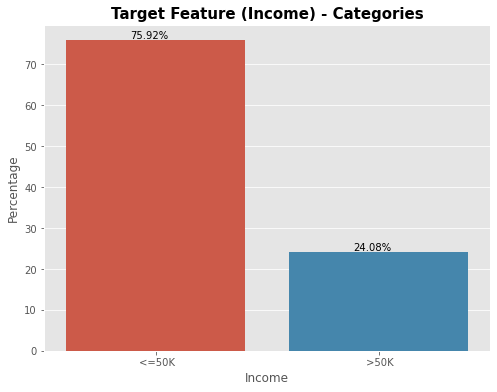

In [24]:
target_df = df_census['Income'].value_counts()*100/df_census.shape[0]
plt.figure(figsize=(8, 6))
plt.title('Target Feature (Income) - Categories', fontweight='bold', fontsize=15)
ax = sns.barplot(x=target_df.index, y=target_df.values)
plt.xlabel("Income")
plt.ylabel("Percentage")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, _ = p.get_xy()
    ax.text(x + width/2.8 , height+0.5, f"{height:.2f}%")

<h4>Inferences:</h4>

 1. The category of target variable is in the ratio of 3:1 which makes the dataset as **Imbalanced**.
 2. We will have to use either of SMOTE, Oversampling or Undersampling techniques to resolve this Imbalanced dataset issue

### Impact of Target Feature on other Continuous columns

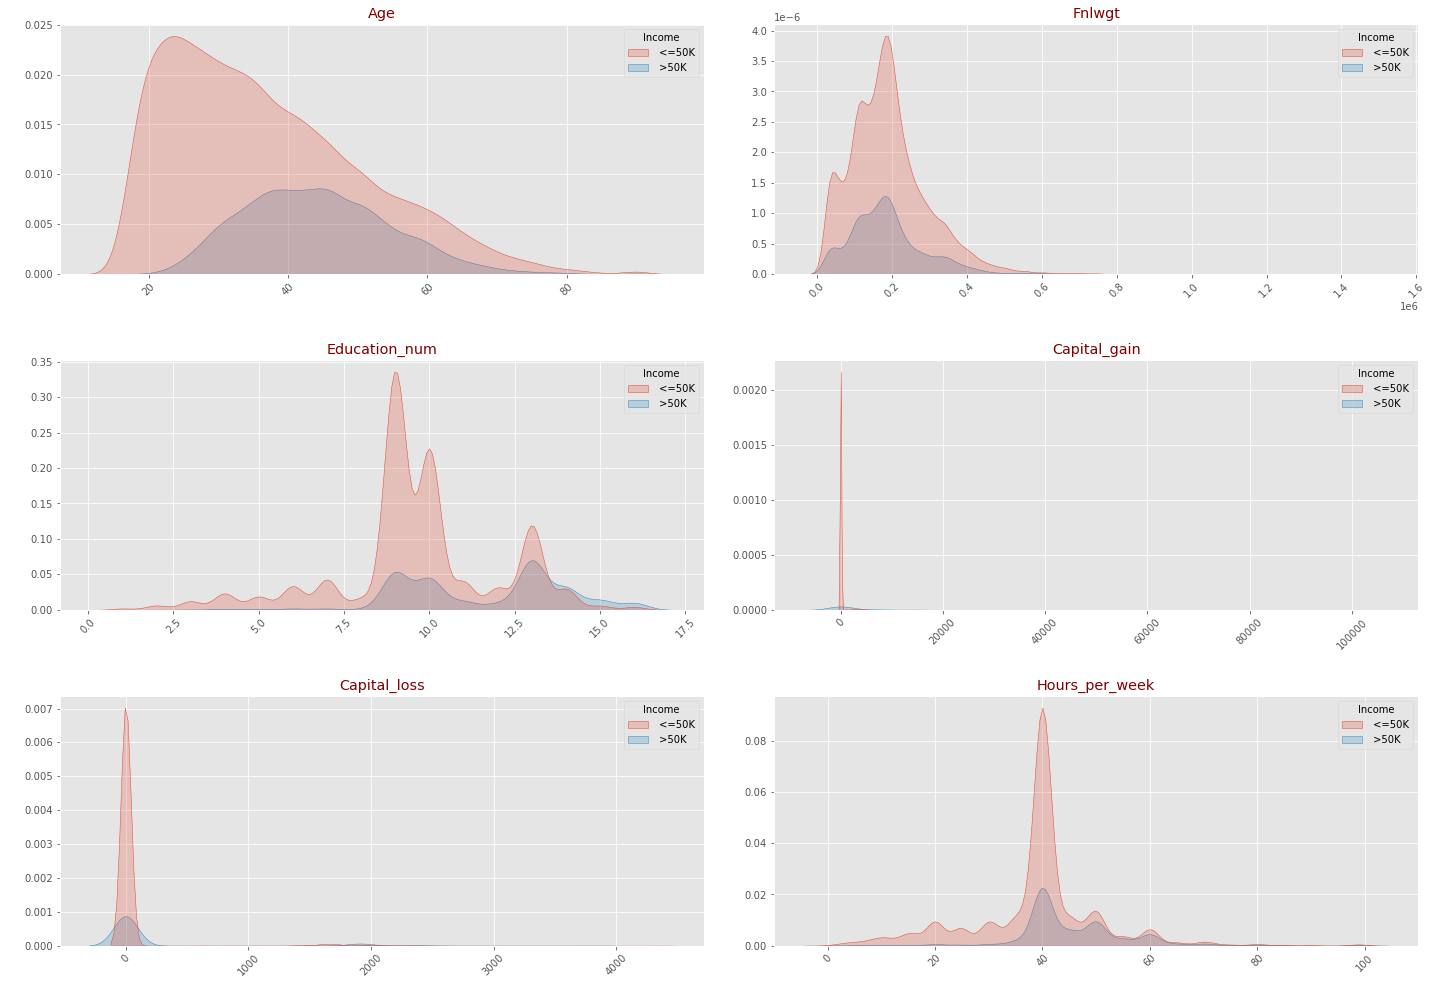

In [25]:
color_ = ['#000057', '#005757', '#005700' ,'#ad7100',  '#008080', '#575757', '#003153'] 
cmap_ = ['magma', 'copper', 'crest']

plt.style.use("ggplot")
plt.figure(figsize = (20,18))

for i in enumerate(df_census[cont_features].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(4,2,i[0]+1)
    sns.kdeplot(data = df_census, x = i[1], hue = 'Income', fill = rand_col, color = rand_col )
    plt.title (i[1], color = 'maroon')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(rotation = 45)
    plt.tight_layout()

<H3>Inferences:</H3>

 1. **Age:**
     - Most of the people who earns <=50k are youngsters (age group between 21 to 40)
     - People who earns >50k are middle aged people (age group between 35 to 48). This means, these people took time to reach this limit (may be, the higher eduction could have helped them to reach this level)
     
     
 2. **Final Weight:**
     - The distribution doesn't vary much for this feature. 
     
     
 3. **Education or Education_Num:**
     - Most of the people who earns <=50k has ther Higher Studies (HS-grad) or Some College degree (Some-college).
     - Most of the people who earns >50k  has "Batchlors" , "HS-grad" or College degree. Means, having these degrees may lead to <=50k or >50k income depending on their age or skill.
     - However, person who is having Doctorate or Prof-Schooling would get >50k income (mostly).
     
     
 4. **Hours per week:**
     - Most of the people who earns <=50k or >50k of income, has to work 40 hours per week (approx).

## Label Encoding

In [26]:
for col in df_census.columns:
    if df_census[col].dtypes == 'object':
        le = LabelEncoder()
        df_census[col] = le.fit_transform(df_census[col])

## Feature Selection

In [27]:
X = df_census.drop('Income', axis=1)
y = df_census['Income']

In [28]:
selector = ExtraTreesClassifier()
selector.fit(X, y)

ExtraTreesClassifier()

In [29]:
feature_imp = selector.feature_importances_

In [30]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.45
1 3.99
2 16.71
3 12.73
4 7.21
5 7.55
6 8.87
7 1.42
8 3.11
9 9.1
10 2.9
11 9.44
12 1.51


In [31]:
df_imp_feature = pd.DataFrame()
df_imp_feature['Feature'] = X.columns
df_imp_feature['Values'] = feature_imp

In [32]:
df_imp_feature.sort_values('Values',ascending=False)

,Feature,Values
2,Fnlwgt,0.167103
0,Age,0.154520
3,Education_num,0.127285
11,Hours_per_week,0.094447
9,Capital_gain,0.090997
6,Relationship,0.088694
5,Occupation,0.075532
4,Marital_status,0.072056
1,Workclass,0.039902
8,Sex,0.031129


#### Observation

1. The features "Native_country" and "Race" are having lower feature importance. So it can be removed.
2. Other 12 features explains the variation of 96.96% without these 2 features.

In [33]:
X = X.drop(['Native_country','Race','Capital_loss','Sex'], axis=1)

In [34]:
X.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Hours_per_week
0,50,5,83311,13,2,3,0,0,13
1,38,3,215646,9,0,5,1,0,40
2,53,3,234721,7,2,5,0,0,40
3,28,3,338409,13,2,9,5,0,40
4,37,3,284582,14,2,3,5,0,40


## Feature Scaling

In [35]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
X

array([[ 0.83709708,  1.72133587, -1.0087417 , ..., -0.90017662,
        -0.14591373, -2.22212013],
       [-0.04264043, -0.08522344,  0.24504633, ..., -0.27780963,
        -0.14591373, -0.03542999],
       [ 1.05703146, -0.08522344,  0.42576955, ..., -0.90017662,
        -0.14591373, -0.03542999],
       ...,
       [ 1.42358875, -0.08522344, -0.3588108 , ...,  1.58929131,
        -0.14591373, -0.03542999],
       [-1.21562378, -0.08522344,  0.11092744, ...,  0.96692433,
        -0.14591373, -1.65520046],
       [ 0.98372   ,  0.81805622,  0.92986178, ...,  2.21165829,
         1.88840054, -0.03542999]])

## Fix dataset imbalance using SMOTE

In [37]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [38]:
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X,y)

In [39]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income, dtype: object

## Create train test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=21)

## Build Models

In [41]:
models = {
    'LR_model' : LogisticRegression(),
    'RD_model' : RidgeClassifier(),
    'DT_model' : DecisionTreeClassifier(),
    'SV_model' : SVC(),
    'Naive_model': GaussianNB(),
    'KNR_model' : KNeighborsClassifier(),
    'RFR_model' : RandomForestClassifier(),
    'XGB_model' : XGBClassifier(),
    'SGH_model' : SGDClassifier(),
    'Bag_model' :BaggingClassifier(),
    'ADA_model' :AdaBoostClassifier(),
    'GB_model' : GradientBoostingClassifier(),
}

In [42]:
scores_dict = {}

In [43]:
for key in models:
    m = models[key]
    m.fit(X_train,y_train)
    y_pred= m.predict(X_test)
    scores_dict[key] = {
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 2),
        'F1 Score': round(f1_score(y_test, y_pred) * 100, 2),
    }

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
scores_df = pd.DataFrame(scores_dict)
scores_df_t = scores_df.T

In [45]:
scores_df_t

,Accuracy,F1 Score
LR_model,75.89,76.02
RD_model,75.46,76.25
DT_model,84.78,84.95
SV_model,83.21,84.28
Naive_model,66.33,53.25
KNR_model,85.56,86.63
RFR_model,89.75,89.91
XGB_model,90.35,90.40
SGH_model,75.88,76.10
Bag_model,87.90,87.86


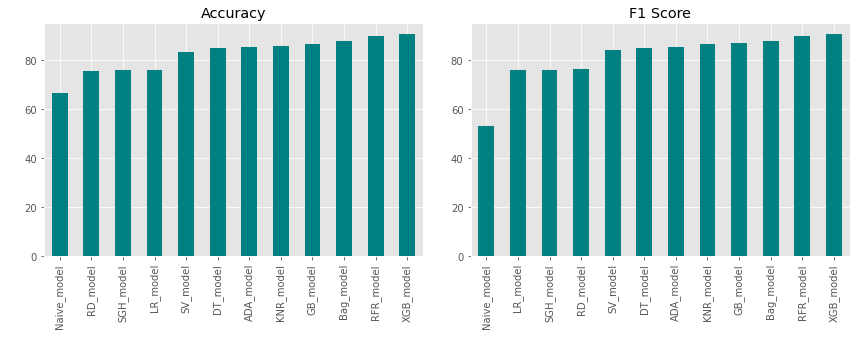

In [47]:
plt.figure(figsize= (12,5))
for i,col in enumerate(scores_df_t.columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(1,2, i+1)
         
    scores_df_t[col].sort_values().plot(kind='bar', color=rand_col)
    plt.title(col, color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

plt.show();

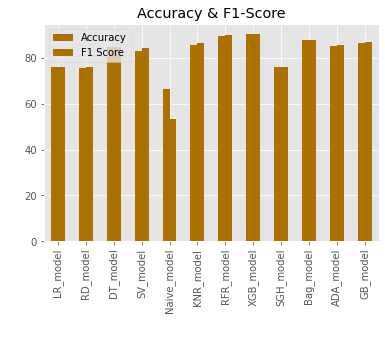

In [48]:
rand_col = color_[random.sample(range(6), 1)[0]]
scores_df_t.plot(kind='bar', color=rand_col)
plt.title("Accuracy & F1-Score", color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.show;

## Hyperparameter tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [50]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=200, num=45)]
max_depth = [int(x) for x in np.linspace(70, 150, num=45)]
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
min_samples_split= [2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

In [51]:
param_grid= {'n_estimators': n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }

In [52]:
rf_tuned = RandomForestClassifier(random_state=21)

In [53]:
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param_grid, cv=5, n_jobs=-1, random_state=21)

In [54]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
                   n_jobs=-1,
                   param_distributions={'max_depth': [70, 71, 73, 75, 77, 79,
                                                      80, 82, 84, 86, 88, 90,
                                                      91, 93, 95, 97, 99, 100,
                                                      102, 104, 106, 108, 110,
                                                      111, 113, 115, 117, 119,
                                                      120, 122, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [100, 102, 104, 106,
                                                         109, 111,

In [55]:
print(f"Base score: {rf_cv.best_score_}")

Base score: 0.8909987357774968


In [56]:
rf_cv.best_params_

{'n_estimators': 159,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 71}

#### GridSearch CV

In [57]:
n_estimators = [int(x) for x in np.linspace(start=140, stop=160, num=30)]
max_depth = [int(x) for x in np.linspace(60, 80, num=30)]
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
min_samples_split= [2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }

In [ ]:
rf_tuned = RandomForestClassifier(random_state=21)

rf_grid_cv = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

#### Apply the parms in the actual model

In [117]:
rf_best = RandomForestClassifier(max_depth=102, n_estimators=40, random_state=21)

In [118]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=21)

In [119]:
y_pred_rf_best = rf_best.predict(X_test)

In [120]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 89.84
F1 score: 89.98


In [ ]:
cm = confusion_matrix(Y_test, Y_pred_rf_best)

plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred_rf_best))